<a href="https://colab.research.google.com/github/scrambler07/Task_3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [30]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [31]:
mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping)
le = LabelEncoder()
cols = ['airconditioning','prefarea','hotwaterheating','basement','guestroom','mainroad']
for col in cols:
  df[col] = le.fit_transform(df[col])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


##Separate features and target

In [32]:
X = df.drop("price", axis=1)
y = df["price"]

##Split into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##Linear Regression with feature scaling

In [39]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
print(X_train.head())
print(X_test.head())

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
272  4075         3          1        1         1          1         1   
40   6550         3          1        2         1          0         1   
326  4100         4          1        1         0          0         1   
441  4370         3          1        2         1          0         0   
511  3180         3          1        1         0          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
272                0                0        2         0                 1  
40                 0                1        0         1                 2  
326                0                0        0         0                 0  
441                0                0        0         0                 0  
511                0                0        0         0                 0  
      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
62    6240        

##Evaluation

In [35]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²:  {r2:.2f}\n")

Model Evaluation:
MAE: 898629.30
MSE: 1602773742288.00
R²:  0.62



##Interpreting coeficients

In [ ]:
feature_names = X.columns
coefficients = model.named_steps['linearregression'].coef_

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
print("Model Coefficients (Standardized Features):")
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False), "\n")

##Predicted vs Actual

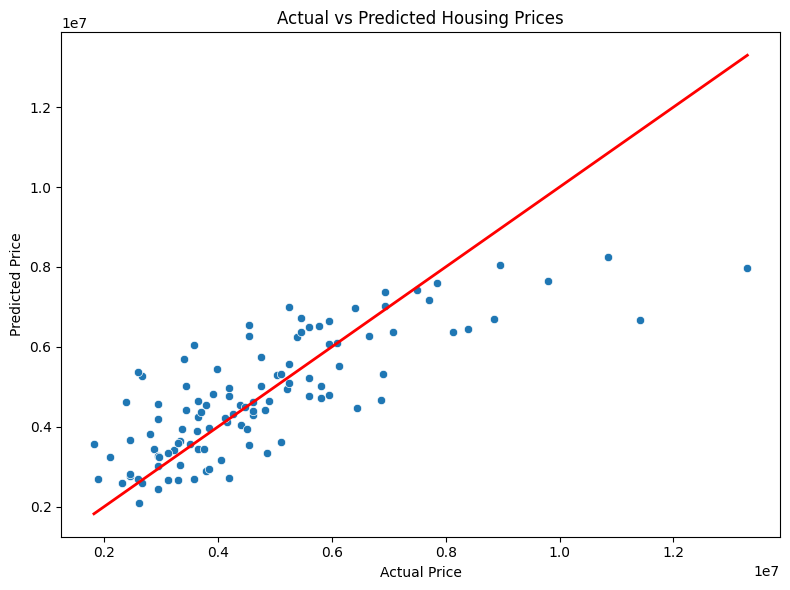

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.tight_layout()
plt.show()